In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=13.0)
rc('text', usetex=False)
rc('figure', figsize=(11.69,8.27))

from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(14.0)
panel_label_font.set_family("sans-serif")

# Seaborn styles
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("out.csv", index_col="id", dtype={'cr_works':str})
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

df = df[~df.date.isnull()]

/home/asura/.virtualenvs/altmetrics/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
len(df)

1670795

In [5]:
100*df.cr_works.value_counts().div(len(df)).round(3)

200                66.6
404                33.0
ReadTimeout         0.3
503                 0.0
500                 0.0
ConnectionError     0.0
Name: cr_works, dtype: float64

In [6]:
pdf = pd.DataFrame(columns=["date", "doi", "cr_works"])
a = df[df.cr_works=="200"].set_index("date").groupby(pd.Grouper(freq="M")).doi.count().reset_index()
a['cr_works'] = "200"
pdf = pdf.append(a)

a = df[df.cr_works=="404"].set_index("date").groupby(pd.Grouper(freq="M")).doi.count().reset_index()
a['cr_works'] = "404"
pdf = pdf.append(a)
pdf.index = range(len(pdf))
pdf.date = pd.to_datetime(pdf.date)

pdf = pdf.replace("200", "Found DOI")
pdf = pdf.replace("404", "CoulI'm in until 5ish
￼dn't find DOI")

fig = plt.figure()
ax = plt.gca()
ax.xaxis_date()

sns.lineplot(x="date", y="doi", hue="cr_works", style="cr_works", data=pdf, markers=True)

# ax.xaxis.set_major_formatter(plt.FixedFormatter(pdf.date.dt.strftime("%Y")))

plt.gcf().autofmt_xdate()
sns.despine(left=True, right=True, top=True)

SyntaxError: EOL while scanning string literal (<ipython-input-6-e057c411a0ec>, line 13)

/home/asura/.virtualenvs/altmetrics/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


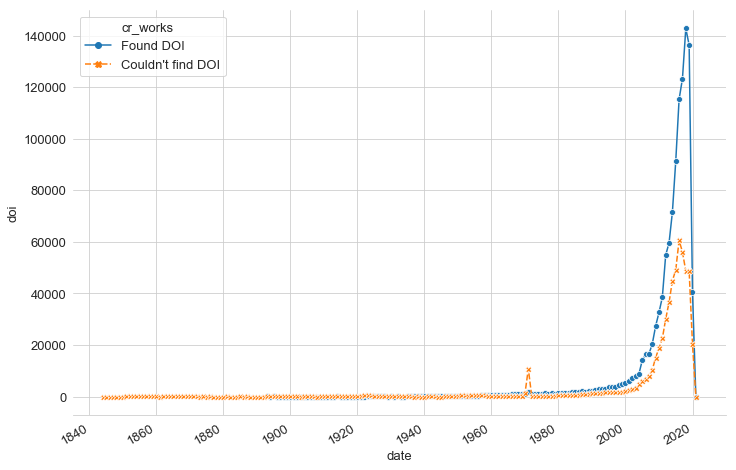

In [7]:
pdf = pd.DataFrame(columns=["date", "doi", "cr_works"])
a = df[df.cr_works=="200"].set_index("date").groupby(pd.Grouper(freq="Y")).doi.count().reset_index()
a['cr_works'] = "200"
pdf = pdf.append(a)

a = df[df.cr_works=="404"].set_index("date").groupby(pd.Grouper(freq="Y")).doi.count().reset_index()
a['cr_works'] = "404"
pdf = pdf.append(a)
pdf.index = range(len(pdf))
pdf.date = pd.to_datetime(pdf.date)

pdf = pdf.replace("200", "Found DOI")
pdf = pdf.replace("404", "Couldn't find DOI")

fig = plt.figure()
ax = plt.gca()
ax.xaxis_date()

sns.lineplot(x="date", y="doi", hue="cr_works", style="cr_works", data=pdf, markers=True)

# ax.xaxis.set_major_formatter(plt.FixedFormatter(pdf.date.dt.strftime("%Y")))
# plt.xlim(1960, 2022)

plt.gcf().autofmt_xdate()
sns.despine(left=True, right=True, top=True)

In [9]:
df[df.cr_works=="200"]

,doi,date,cr_works,timestamp
id,,,,
1447244,10.14258/abs.v4i1.3916,2020-03-19,200,2019-07-03 05:21:19.250810
1678968,10.14742/ajet.4711,2020-01-04,200,2019-07-03 05:21:19.268332
1675559,10.14742/ajet.4926,2020-01-02,200,2019-07-03 05:21:19.269039
1675557,10.14742/ajet.4561,2020-01-01,200,2019-07-03 05:21:19.277330
1675558,10.14742/ajet.5048,2020-01-01,200,2019-07-03 05:21:19.281081
1675560,10.14742/ajet.4523,2020-01-01,200,2019-07-03 05:21:19.283482
1675561,10.14742/ajet.4766,2020-01-01,200,2019-07-03 05:21:19.284864
573194,10.17851/2179-8478.0.1.123-134,2019-12-31,200,2019-07-03 05:21:19.285068
1648746,10.5614/j.eng.technol.sci.2018.50.6.2,2019-12-31,200,2019-07-03 05:21:19.285292
